<a href="https://colab.research.google.com/github/Kanka-max/OfGitHub/blob/main/Cluster_with_Incremental_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

**PROJECT DEFINITION**

- FinAccess is a series of household surveys that measure the access, usage, quality and impact of financial services in Kenya.
- The five surveys so far – 2006, 2009, 2013, 2016 and 2019
- The data is collected by KNBS and funded by the Central Bank and FSD, and some commercial banks

**CRITERIA FOR SUCCESS**

In [ ]:
# 3 Import the data
import io
from google.colab import files 

uploaded = files.upload()

data = pd.read_csv('finaccess_data.csv')

Saving finaccess_data.csv to finaccess_data.csv


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:

data.head()

In [ ]:
# 4. Data Expoloration

In [ ]:
data.shape

(8669, 72)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8669 entries, 0 to 8668
Data columns (total 72 columns):
Residence         8669 non-null int64
Household Size    8669 non-null int64
Resp              8669 non-null int64
Age               8669 non-null int64
Education         8669 non-null int64
Marital           8669 non-null int64
Income            8669 non-null int64
Save_Micro        8669 non-null int64
Sav_Mobank        8669 non-null int64
Sav_Mob           8669 non-null int64
Sav_Coop          8669 non-null int64
Save_Chama        8669 non-null int64
Sav_Friends       8669 non-null int64
Sav_FamKeep       8669 non-null int64
Sav_Secret        8669 non-null int64
Mob_M1y           8669 non-null int64
Mob_Bank          8669 non-null int64
Loan_Bank         8669 non-null int64
Loan_Mobank       8669 non-null int64
Loan_Coop         8669 non-null int64
Loan_Micro        8669 non-null int64
Loan_Shy          8669 non-null int64
Loan_Chama        8669 non-null int64
Loan_Gov          8

**Data** **Preparation**

In [ ]:
data["Light_Type"]= pd.Categorical(data.Light_Type)
#data.fillna(method="ffill")
data.dtypes

Residence         int64
Household Size    int64
Resp              int64
Age               int64
Education         int64
                  ...  
Banana            int64
Towels            int64
Flask             int64
Own_Land          int64
House_0ship       int64
Length: 72, dtype: object

In [ ]:
data.columns

Index(['Residence', 'Household Size', 'Resp', 'Age', 'Education', 'Marital',
       'Income', 'Save_Micro', 'Sav_Mobank', 'Sav_Mob', 'Sav_Coop',
       'Save_Chama', 'Sav_Friends', 'Sav_FamKeep', 'Sav_Secret', 'Mob_M1y',
       'Mob_Bank', 'Loan_Bank', 'Loan_Mobank', 'Loan_Coop', 'Loan_Micro',
       'Loan_Shy', 'Loan_Chama', 'Loan_Gov', 'Loan_Emp', 'Loan_Friend',
       'Loan_Shop', 'Credit_Shop', 'Digi_Loan', 'Loan_Agri', 'Hire_Purchase',
       'Loan_House', 'Loan_Gov.1', 'Curr_Acc', 'Post_Acc', 'Inv_Acc',
       'Everday_Acc', 'Bank_OD', 'Atm_Card', 'Credit_Card', 'Shares',
       'T_Bills', 'Mutual_Funds', 'Car_Ins', 'Home_Ins', 'Crop_Ins',
       'Live_Ins', 'NHIF', 'Med-Ins', 'Life_Ins', 'Edu_Ins', 'Other_Ins',
       'NSSF', '6', 'Mbao_6', 'Ind_6', '9_6', 'Crypto', 'Dwelling_ type',
       'Floor_Type', 'Wall_Type', 'Fuel_Type', 'Light_Type', 'Main_Water',
       'Toilet_Type', 'Bread', 'Fish', 'Banana', 'Towels', 'Flask', 'Own_Land',
       'House_0ship'],
      dtype='object'

In [ ]:
data = data[['Residence', 'Household Size', 'Resp', 'Age', 'Education', 'Marital',
       'Income', 'Save_Micro', 'Sav_Mobank', 'Sav_Mob', 'Sav_Coop',
       'Save_Chama', 'Sav_Friends', 'Sav_FamKeep', 'Sav_Secret', 'Mob_M1y',
       'Mob_Bank', 'Loan_Bank', 'Loan_Mobank', 'Loan_Coop', 'Loan_Micro',
       'Loan_Shy', 'Loan_Chama', 'Loan_Gov', 'Loan_Emp', 'Loan_Friend',
       'Loan_Shop', 'Credit_Shop', 'Digi_Loan', 'Loan_Agri', 'Hire_Purchase',
       'Loan_House', 'Loan_Gov.1', 'Curr_Acc', 'Post_Acc', 'Inv_Acc',
       'Everday_Acc', 'Bank_OD', 'Atm_Card', 'Credit_Card', 'Shares',
       'T_Bills', 'Mutual_Funds', 'Car_Ins', 'Home_Ins', 'Crop_Ins',
       'Live_Ins', 'NHIF', 'Med-Ins', 'Life_Ins', 'Edu_Ins', 'Other_Ins',
       'NSSF', '6', 'Mbao_6', 'Ind_6', '9_6', 'Crypto', 'Dwelling_ type',
       'Floor_Type', 'Wall_Type', 'Fuel_Type', 'Main_Water', 'Toilet_Type',
       'Bread', 'Fish', 'Banana', 'Towels', 'Flask', 'Own_Land']]

In [ ]:
demographic = data[['Residence', 'Household Size', 'Resp', 'Age', 'Education', 'Marital']]
financial_habit = data [['Income', 'Save_Micro', 'Sav_Mobank', 'Sav_Mob', 'Sav_Coop',
       'Save_Chama', 'Sav_Friends', 'Sav_FamKeep', 'Sav_Secret', 'Mob_M1y',
       'Mob_Bank', 'Loan_Bank', 'Loan_Mobank', 'Loan_Coop', 'Loan_Micro',
       'Loan_Shy', 'Loan_Chama', 'Loan_Gov', 'Loan_Emp', 'Loan_Friend',
       'Loan_Shop', 'Credit_Shop', 'Digi_Loan', 'Loan_Agri', 'Hire_Purchase',
       'Loan_House', 'Loan_Gov.1', 'Curr_Acc', 'Post_Acc', 'Inv_Acc',
       'Everday_Acc', 'Bank_OD', 'Atm_Card', 'Credit_Card', 'Shares',
       'T_Bills', 'Mutual_Funds', 'Car_Ins', 'Home_Ins', 'Crop_Ins',
       'Live_Ins', 'NHIF', 'Med-Ins', 'Life_Ins', 'Edu_Ins', 'Other_Ins',
       'NSSF', '6', 'Mbao_6', 'Ind_6', '9_6', 'Crypto']]
housing = [['Dwelling_ type','Floor_Type', 'Wall_Type', 'Fuel_Type', 'Main_Water', 'Toilet_Type',
       'Bread', 'Fish', 'Banana', 'Towels', 'Flask', 'Own_Land']]

In [ ]:
data.shape

(8669, 70)

In [ ]:
# Statistical Analysis

In [ ]:
data.describe()

,Residence,Household Size,Resp,Age,Education,Marital,Income,Save_Micro,Sav_Mobank,Sav_Mob,...,Wall_Type,Fuel_Type,Main_Water,Toilet_Type,Bread,Fish,Banana,Towels,Flask,Own_Land
count,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,...,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000
mean,0.416542,3.974276,0.577460,39.293690,2.493136,2.025955,3.050179,0.040028,0.316530,0.855116,...,0.942439,1.782212,4.134964,2.951898,0.533049,0.561656,0.523474,0.578383,0.714154,0.579306
std,0.493014,2.321904,0.493992,17.103637,2.015023,1.291463,3.168386,0.258477,0.695878,0.966085,...,0.905317,2.434723,3.173460,1.435385,0.498935,0.496213,0.499477,0.493846,0.451843,0.519212
min,0.000000,1.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,26.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.000000,1.000000,35.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,5.000000,1.000000,50.000000,4.000000,3.000000,7.000000,0.000000,0.000000,2.000000,...,2.000000,5.000000,8.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,21.000000,1.000000,95.000000,10.000000,10.000000,11.000000,2.000000,2.000000,2.000000,...,2.000000,10.000000,11.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


In [ ]:
#The average age is 39 years
# Half-Quartile consists of age=>50 years
# Minimum age is 16 years, max age is 95 years
# Average household size is 4, 

In [ ]:
#Other statistics?

#sb.set(style="ticks", color_codes=True)

#g = sb.pairplot(data)

In [ ]:
# Data Visualization?

In [ ]:

import random

**Data Modelling**

In [ ]:
#Standardize features by removing the mean and scaling to unit variance
#use Standard Scaler
#scale because clustering is sensitive to range of data

X = data
X =X.values

In [ ]:
#Standardize features by removing the mean and scaling to unit variance

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#assuming we do not know the number of clusters

kmeans = KMeans(n_clusters = 9)

#Fitting the model with only the features
kmeans.fit(X_scaled)

#use it to predict the clusters groups from the patterns observed 

y_kmeans = kmeans.predict(X_scaled)

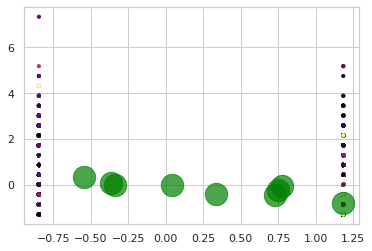

In [ ]:
#plot

#Plotting the data again while our clusters have been colour coded 
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c = y_kmeans, s = 10, cmap = 'inferno')

centers = kmeans.cluster_centers_

# centers based on the clusters

plt.scatter(centers[:,0], centers[:,1], c = 'green', s = 500, alpha = 0.7);


In [ ]:


cluster_range = range(1,10)

#Declaring distorsions as an empty list
cluster_errors = []

#iterating over values from 1 to 10 to find the best value for k/ clusters
for num_clusters in cluster_range:
    clusters = KMeans(n_clusters = num_clusters)
    clusters.fit(X_scaled)
    cluster_errors.append(clusters.inertia_)  
    
    
#adding the mean squared distance of the centroids for the defined number of clusters
#.inertia_ function in Kmeans is used to determine how the model performed in the instance by giving out an average distortions value.

In [ ]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[1:10]

,num_clusters,cluster_errors
1,2,560570.477413
2,3,541503.431464
3,4,528769.118334
4,5,519272.929414
5,6,510754.610692
6,7,501109.330901
7,8,493054.416657
8,9,487459.462694


Text(0, 0.5, 'WSS value')

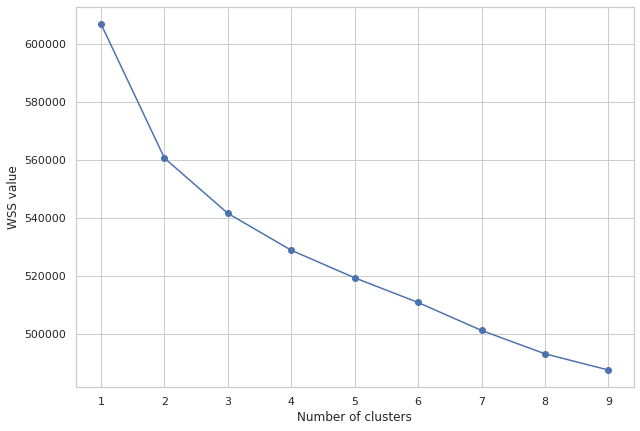

In [ ]:
plt.figure(figsize=(10,7))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.xlabel('Number of clusters')
plt.ylabel('WSS value')

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_scaled)
y_kmeans = kmeans.predict(X_scaled)

In [ ]:
y_kmeans

array([4, 2, 1, ..., 8, 1, 8], dtype=int32)

In [ ]:
# clusters are formed based on the closeness to the center value of the clusters. 
# The initial center value is chosen randomly.

centers = kmeans.cluster_centers_
centers

array([[ 7.46713767e-01, -2.12023664e-01,  4.92141540e-02,
        -5.84628957e-01,  2.57412846e-01, -6.05322579e-01,
         4.56778296e-01, -1.32042702e-01, -2.80232454e-01,
        -1.05911421e-01, -2.32254319e-01, -2.75274635e-01,
        -1.79781651e-01, -1.42735478e-01, -1.06998842e-01,
        -1.15076804e-01, -2.95159264e-01, -1.72970767e-01,
        -2.91213258e-01, -2.01041861e-01, -1.14865504e-01,
        -5.62368489e-02, -2.50412336e-01, -6.32221704e-02,
        -5.49065137e-02, -1.73735469e-01, -7.99085645e-02,
        -3.33360134e-01, -6.80804989e-02, -1.17136717e-01,
        -1.01922351e-01, -5.78187477e-02, -2.57705369e-02,
        -4.94094106e-02, -4.63681961e-02, -7.85284019e-02,
        -2.26588514e-01, -5.59082556e-02, -2.61494425e-01,
        -6.46883690e-02, -1.39937171e-01, -2.05238915e-02,
        -2.77135072e-02, -8.25126562e-02, -3.52462128e-02,
        -4.45206986e-02, -4.05425048e-02, -2.14721189e-01,
        -8.72512169e-02, -9.27294501e-02, -7.03341903e-0

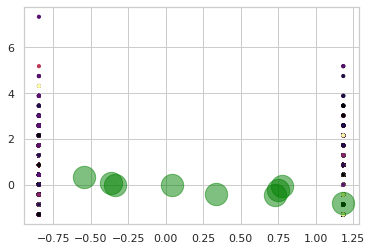

In [ ]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, s = 10, cmap = 'inferno')
plt.scatter(centers[:, 0], centers[:, 1], c = 'green', s = 500, alpha=0.5)
#plt.xlabel("")
#plt.ylabel("")

In [ ]:
import numpy as np
from sklearn.decomposition import PCA, IncrementalPCA


In [ ]:
X = data[['Residence', 'Household Size', 'Resp', 'Education', 'Marital',
       'Income', 'Save_Micro', 'Sav_Mobank', 'Sav_Mob', 'Sav_Coop',
       'Save_Chama', 'Sav_Friends', 'Sav_FamKeep', 'Sav_Secret', 'Mob_M1y',
       'Mob_Bank', 'Loan_Bank', 'Loan_Mobank', 'Loan_Coop', 'Loan_Micro',
       'Loan_Shy', 'Loan_Chama', 'Loan_Gov', 'Loan_Emp', 'Loan_Friend',
       'Loan_Shop', 'Credit_Shop', 'Digi_Loan', 'Loan_Agri', 'Hire_Purchase',
       'Loan_House', 'Loan_Gov.1', 'Curr_Acc', 'Post_Acc', 'Inv_Acc',
       'Everday_Acc', 'Bank_OD', 'Atm_Card', 'Credit_Card', 'Shares',
       'T_Bills', 'Mutual_Funds', 'Car_Ins', 'Home_Ins', 'Crop_Ins',
       'Live_Ins', 'NHIF', 'Med-Ins', 'Life_Ins', 'Edu_Ins', 'Other_Ins',
       'NSSF', '6', 'Mbao_6', 'Ind_6', '9_6', 'Crypto', 'Dwelling_ type',
       'Floor_Type', 'Wall_Type', 'Fuel_Type', 'Main_Water', 'Toilet_Type',
       'Bread', 'Fish', 'Banana', 'Towels', 'Flask', 'Own_Land']]
y = data[["Age"]]

* Splitting training set

In [ ]:
from sklearn.model_selection import train_test_split

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(data.drop("Age", axis=1),
                                                   data['Age'],
                                                   test_size = 0.4,
                                                   random_state = 0)

* Standardization

In [ ]:
sc_X = StandardScaler()

X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.fit_transform(X_test))

X_train2.columns = X_train.columns.values
X_test2.columns = X_test2.columns.values

X_train = X_train2
X_test = X_test2

In [ ]:
X_train.head()

,Residence,Household Size,Resp,Education,Marital,Income,Save_Micro,Sav_Mobank,Sav_Mob,Sav_Coop,...,Wall_Type,Fuel_Type,Main_Water,Toilet_Type,Bread,Fish,Banana,Towels,Flask,Own_Land


In [ ]:

n_components = 2

ipca = IncrementalPCA(n_components=n_components, batch_size=10)

X_ipca = ipca.fit_transform(X_train, y_train)

ValueError: Found array with 0 sample(s) (shape=(0, 69)) while a minimum of 1 is required.

In [ ]:
import numpy as np

In [ ]:
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_train, y_train)

colors = ['navy', 'turquoise', 'darkorange']

for X_transformed, title in [(X_ipca, "Incremental PCA"), (X_pca, "PCA")]:
    plt.figure(figsize=(8, 8))
    for color, i, target_name in zip(colors, [0, 1, 2], data.Age):
        plt.scatter(X_transformed[0], X_transformed[1],
                    color=color, lw=2, label= target_name)

    if "Incremental" in title:
        err = np.abs(np.abs(X_pca) - np.abs(X_ipca)).mean()
        plt.title(title + " of customer dataset\nMean absolute unsigned error "
                  "%.6f" % err)
    else:
        plt.title(title + " ")
    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.axis([-4, 4, -1.5, 1.5])


* Visualization serves as a visual check that IPCA is able to find a similar projection of the data to PCA (to a sign flip),while only processing a few samples at a time. 
* IPCA is intended for large datasets which do not fit in main memory, requiring incremental approaches.
* techniques such as Principal Component Analysis (PCA), which we can use for visualising a dataset with many feature

In [ ]:

#Calculating Eucledian Distance with KMeans
#Calculating Average Distortions Value 
#Elbow-Point: a point where the average distortions value of a cluster number shows little change from that given point onwards

In [ ]:
Y =data.iloc[:,].values


In [ ]:
Y

array([[0, 6, 0, ..., 0, 0, 0],
       [0, 7, 0, ..., 0, 0, 0],
       [0, 5, 0, ..., 1, 0, 1],
       ...,
       [1, 1, 0, ..., 1, 1, 0],
       [0, 4, 1, ..., 1, 1, 1],
       [1, 3, 1, ..., 1, 1, 0]], dtype=int64)

In [ ]:
from sklearn.cluster import KMeans 

In [ ]:
clusterer = KMeans(3, random_state=1)

# Then passing our data the clusterer
# ---
# 
clusterer.fit(Y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [ ]:
data['cluster_group'] = clusterer.predict(Y)

In [ ]:
data.sample(10)

,Residence,Household Size,Resp,Age,Education,Marital,Income,Save_Micro,Sav_Mobank,Sav_Mob,Sav_Coop,Save_Chama,Sav_Friends,Sav_FamKeep,Sav_Secret,Mob_M1y,Mob_Bank,Loan_Bank,Loan_Mobank,Loan_Coop,Loan_Micro,Loan_Shy,Loan_Chama,Loan_Gov,Loan_Emp,Loan_Friend,Loan_Shop,Credit_Shop,Digi_Loan,Loan_Agri,Hire_Purchase,Loan_House,Loan_Gov.1,Curr_Acc,Post_Acc,Inv_Acc,Everday_Acc,Bank_OD,Atm_Card,Credit_Card,Shares,T_Bills,Mutual_Funds,Car_Ins,Home_Ins,Crop_Ins,Live_Ins,NHIF,Med-Ins,Life_Ins,Edu_Ins,Other_Ins,NSSF,6,Mbao_6,Ind_6,9_6,Crypto,Dwelling_ type,Floor_Type,Wall_Type,Fuel_Type,Main_Water,Toilet_Type,Bread,Fish,Banana,Towels,Flask,Own_Land,cluster_group
2650,1,2,0,26,3,3,8,0,2,2,0,2,0,0,2,2,2,0,1,0,0,0,0,0,0,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,3,2,1,0,1,1,1,1,1,0
2721,0,6,1,28,1,2,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,3,0,2,0,2,0,0,0,1,0,0,1,0
8312,0,1,0,72,1,1,3,0,0,1,2,1,1,1,2,2,0,0,0,1,0,0,1,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,4,1,0,1,0,1,1,1
8056,1,2,1,60,3,3,2,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,5,0,1,0,0,1,1,1,0,1
3357,0,5,1,17,2,0,7,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,2,0,8,4,1,1,1,0,1,0,0
7525,0,1,0,48,2,1,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,2,0,2,3,0,0,0,0,0,1,2
1173,0,6,0,20,2,3,7,0,2,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,8,4,0,0,0,0,0,0,0
5176,1,1,0,67,4,3,7,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,3,0,1,0,1,1,1,1,1,1
8119,1,5,1,29,2,3,7,0,0,1,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,4,1,1,1,1,1,1,0
4196,0,2,1,76,0,1,1,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,3,4,0,1,0,0,0,1,1


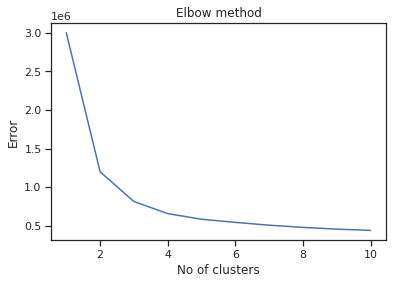

In [ ]:
Error = []

# Then use a for loop to run KNN several times and append values the sum of squared errors 
# the error list created above. The values in this list will then be plotted agains the no. of clusters.
# to create our elbow method visualisation.
# ---
#
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(Y)
    kmeans.fit(Y)
    Error.append(kmeans.inertia_)

# We plot our elbow method visualisation: No. of clusters vs Error
# ---
# 
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error');

**Implementing Solution**

In [ ]:
first_cluster =data[data.cluster_group.isin([0])]
first_cluster.head()

,Residence,Household Size,Resp,Age,Education,Marital,Income,Save_Micro,Sav_Mobank,Sav_Mob,Sav_Coop,Save_Chama,Sav_Friends,Sav_FamKeep,Sav_Secret,Mob_M1y,Mob_Bank,Loan_Bank,Loan_Mobank,Loan_Coop,Loan_Micro,Loan_Shy,Loan_Chama,Loan_Gov,Loan_Emp,Loan_Friend,Loan_Shop,Credit_Shop,Digi_Loan,Loan_Agri,Hire_Purchase,Loan_House,Loan_Gov.1,Curr_Acc,Post_Acc,Inv_Acc,Everday_Acc,Bank_OD,Atm_Card,Credit_Card,Shares,T_Bills,Mutual_Funds,Car_Ins,Home_Ins,Crop_Ins,Live_Ins,NHIF,Med-Ins,Life_Ins,Edu_Ins,Other_Ins,NSSF,6,Mbao_6,Ind_6,9_6,Crypto,Dwelling_ type,Floor_Type,Wall_Type,Fuel_Type,Main_Water,Toilet_Type,Bread,Fish,Banana,Towels,Flask,Own_Land,cluster_group
31,0,2,1,25,6,3,0,0,2,2,0,2,0,0,0,2,2,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,1,1,1,1,1,1,1,0
33,1,1,1,21,2,0,8,0,2,2,0,1,0,0,2,2,2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5,0,1,1,1,1,1,1,0,0
35,1,1,1,25,6,0,2,0,2,2,0,2,0,0,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,1,1,1,1,1,1,1,0,0
42,1,1,1,26,4,0,8,0,0,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5,4,1,1,1,1,1,1,1,0
43,1,3,0,24,6,3,1,0,2,2,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5,1,2,1,1,1,1,1,0,0


In [ ]:
second_cluster =data[data.cluster_group.isin([1])]
second_cluster.head()

,Residence,Household Size,Resp,Age,Education,Marital,Income,Save_Micro,Sav_Mobank,Sav_Mob,Sav_Coop,Save_Chama,Sav_Friends,Sav_FamKeep,Sav_Secret,Mob_M1y,Mob_Bank,Loan_Bank,Loan_Mobank,Loan_Coop,Loan_Micro,Loan_Shy,Loan_Chama,Loan_Gov,Loan_Emp,Loan_Friend,Loan_Shop,Credit_Shop,Digi_Loan,Loan_Agri,Hire_Purchase,Loan_House,Loan_Gov.1,Curr_Acc,Post_Acc,Inv_Acc,Everday_Acc,Bank_OD,Atm_Card,Credit_Card,Shares,T_Bills,Mutual_Funds,Car_Ins,Home_Ins,Crop_Ins,Live_Ins,NHIF,Med-Ins,Life_Ins,Edu_Ins,Other_Ins,NSSF,6,Mbao_6,Ind_6,9_6,Crypto,Dwelling_ type,Floor_Type,Wall_Type,Fuel_Type,Main_Water,Toilet_Type,Bread,Fish,Banana,Towels,Flask,Own_Land,cluster_group
4,0,4,0,63,0,3,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,7,0,0,0,0,0,0,0,1
6,0,2,0,80,1,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,8,4,0,0,0,0,0,1,1
7,0,1,0,57,1,1,1,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,2,0,4,4,0,0,0,0,0,1,1
10,0,6,0,60,1,2,7,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,8,4,0,0,1,1,1,1,1
12,0,1,0,72,0,2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,7,4,1,0,0,0,0,0,1


In [ ]:
third_cluster =data[data.cluster_group.isin([2])]
third_cluster.head()

,Residence,Household Size,Resp,Age,Education,Marital,Income,Save_Micro,Sav_Mobank,Sav_Mob,Sav_Coop,Save_Chama,Sav_Friends,Sav_FamKeep,Sav_Secret,Mob_M1y,Mob_Bank,Loan_Bank,Loan_Mobank,Loan_Coop,Loan_Micro,Loan_Shy,Loan_Chama,Loan_Gov,Loan_Emp,Loan_Friend,Loan_Shop,Credit_Shop,Digi_Loan,Loan_Agri,Hire_Purchase,Loan_House,Loan_Gov.1,Curr_Acc,Post_Acc,Inv_Acc,Everday_Acc,Bank_OD,Atm_Card,Credit_Card,Shares,T_Bills,Mutual_Funds,Car_Ins,Home_Ins,Crop_Ins,Live_Ins,NHIF,Med-Ins,Life_Ins,Edu_Ins,Other_Ins,NSSF,6,Mbao_6,Ind_6,9_6,Crypto,Dwelling_ type,Floor_Type,Wall_Type,Fuel_Type,Main_Water,Toilet_Type,Bread,Fish,Banana,Towels,Flask,Own_Land,cluster_group
0,0,6,0,49,2,3,0,0,2,2,0,2,0,0,0,2,2,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,7,4,1,0,0,0,0,0,2
1,0,7,0,43,2,3,1,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,2,0,7,3,0,0,0,0,0,0,2
2,0,5,0,55,1,3,0,0,0,2,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,7,4,1,0,1,1,0,1,2
3,0,12,1,55,0,3,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,6,1,4,1,1,1,0,1,1,2
5,0,6,0,45,8,3,8,0,0,0,2,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,2,0,0,0,0,0,0,0,0,0,8,4,1,1,1,1,1,1,2


**Clusters Exploratory Analysis**

In [ ]:
demographic = data[['Residence', 'Household Size', 'Resp', 'Age', 'Education', 'Marital']]
financial_habit = data [['Income', 'Save_Micro', 'Sav_Mobank', 'Sav_Mob', 'Sav_Coop',
       'Save_Chama', 'Sav_Friends', 'Sav_FamKeep', 'Sav_Secret', 'Mob_M1y',
       'Mob_Bank', 'Loan_Bank', 'Loan_Mobank', 'Loan_Coop', 'Loan_Micro',
       'Loan_Shy', 'Loan_Chama', 'Loan_Gov', 'Loan_Emp', 'Loan_Friend',
       'Loan_Shop', 'Credit_Shop', 'Digi_Loan', 'Loan_Agri', 'Hire_Purchase',
       'Loan_House', 'Loan_Gov.1', 'Curr_Acc', 'Post_Acc', 'Inv_Acc',
       'Everday_Acc', 'Bank_OD', 'Atm_Card', 'Credit_Card', 'Shares',
       'T_Bills', 'Mutual_Funds', 'Car_Ins', 'Home_Ins', 'Crop_Ins',
       'Live_Ins', 'NHIF', 'Med-Ins', 'Life_Ins', 'Edu_Ins', 'Other_Ins',
       'NSSF', '6', 'Mbao_6', 'Ind_6', '9_6', 'Crypto']]
housing = [['Dwelling_ type','Floor_Type', 'Wall_Type', 'Fuel_Type', 'Main_Water', 'Toilet_Type',
       'Bread', 'Fish', 'Banana', 'Towels', 'Flask', 'Own_Land']]

In [ ]:
from numpy import median, mean

sb.set(style= "whitegrid")

# create cluster subsets

subset_1 = first_cluster

#selecting columns 

demographic = subset_1.iloc[:, 0:6]
financial_habit = subset_1.iloc[:,6:58]
housing = subset_1.iloc[:,58:70]

## create cluster subsets

subset_2 = second_cluster

#selecting columns 

demographic = subset_2.iloc[:, 0:6]
financial_habit = subset_2.iloc[:,6:58]
housing = subset_2.iloc[:,58:70]

# create cluster subsets

subset_3 = third_cluster

#selecting columns 

demographic = subset_3.iloc[:, 0:6]
financial_habit = subset_3.iloc[:,6:58]
housing = subset_1.iloc[:,58:70]

In [ ]:
subset_1.columns

Index(['Residence', 'Household Size', 'Resp', 'Age', 'Education', 'Marital',
       'Income', 'Save_Micro', 'Sav_Mobank', 'Sav_Mob', 'Sav_Coop',
       'Save_Chama', 'Sav_Friends', 'Sav_FamKeep', 'Sav_Secret', 'Mob_M1y',
       'Mob_Bank', 'Loan_Bank', 'Loan_Mobank', 'Loan_Coop', 'Loan_Micro',
       'Loan_Shy', 'Loan_Chama', 'Loan_Gov', 'Loan_Emp', 'Loan_Friend',
       'Loan_Shop', 'Credit_Shop', 'Digi_Loan', 'Loan_Agri', 'Hire_Purchase',
       'Loan_House', 'Loan_Gov.1', 'Curr_Acc', 'Post_Acc', 'Inv_Acc',
       'Everday_Acc', 'Bank_OD', 'Atm_Card', 'Credit_Card', 'Shares',
       'T_Bills', 'Mutual_Funds', 'Car_Ins', 'Home_Ins', 'Crop_Ins',
       'Live_Ins', 'NHIF', 'Med-Ins', 'Life_Ins', 'Edu_Ins', 'Other_Ins',
       'NSSF', '6', 'Mbao_6', 'Ind_6', '9_6', 'Crypto', 'Dwelling_ type',
       'Floor_Type', 'Wall_Type', 'Fuel_Type', 'Main_Water', 'Toilet_Type',
       'Bread', 'Fish', 'Banana', 'Towels', 'Flask', 'Own_Land',
       'cluster_group'],
      dtype='object')

**Cluster One EDA**

In [ ]:
X = subset_1
X = X.values

scaler  = StandardScaler()
cluster1 = scaler.fit(X)


savings = subset_1[["Age", 'Income', 'Save_Micro', 'Sav_Mobank', 'Sav_Mob', 'Sav_Coop',
       'Save_Chama', 'Sav_Friends', 'Sav_FamKeep', 'Sav_Secret', 'Mob_M1y',
       'Mob_Bank']]

loans =  subset_1[["Age", "Income", 'Loan_Bank', 'Loan_Mobank', 'Loan_Coop', 'Loan_Micro',
       'Loan_Shy', 'Loan_Chama', 'Loan_Gov', 'Loan_Emp', 'Loan_Friend',
       'Loan_Shop', 'Credit_Shop', 'Digi_Loan', 'Loan_Agri', 'Hire_Purchase',
       'Loan_House', 'Loan_Gov.1']]

acc = subset_1[["Age", "Income", 'Curr_Acc', 'Post_Acc', 'Inv_Acc',
       'Everday_Acc', 'Bank_OD', 'Atm_Card', 'Credit_Card', 'Shares',
       'T_Bills', 'Mutual_Funds']]

ins = subset_1[["Age", "Income", 'Car_Ins', 'Home_Ins', 'Crop_Ins',
       'Live_Ins', 'NHIF', 'Med-Ins', 'Life_Ins', 'Edu_Ins', 'Other_Ins',
       'NSSF', '6', 'Mbao_6', 'Ind_6', '9_6', 'Crypto']]




Text(0.5, 1.0, 'Distribution of Education Level Vs Age and Household Size')

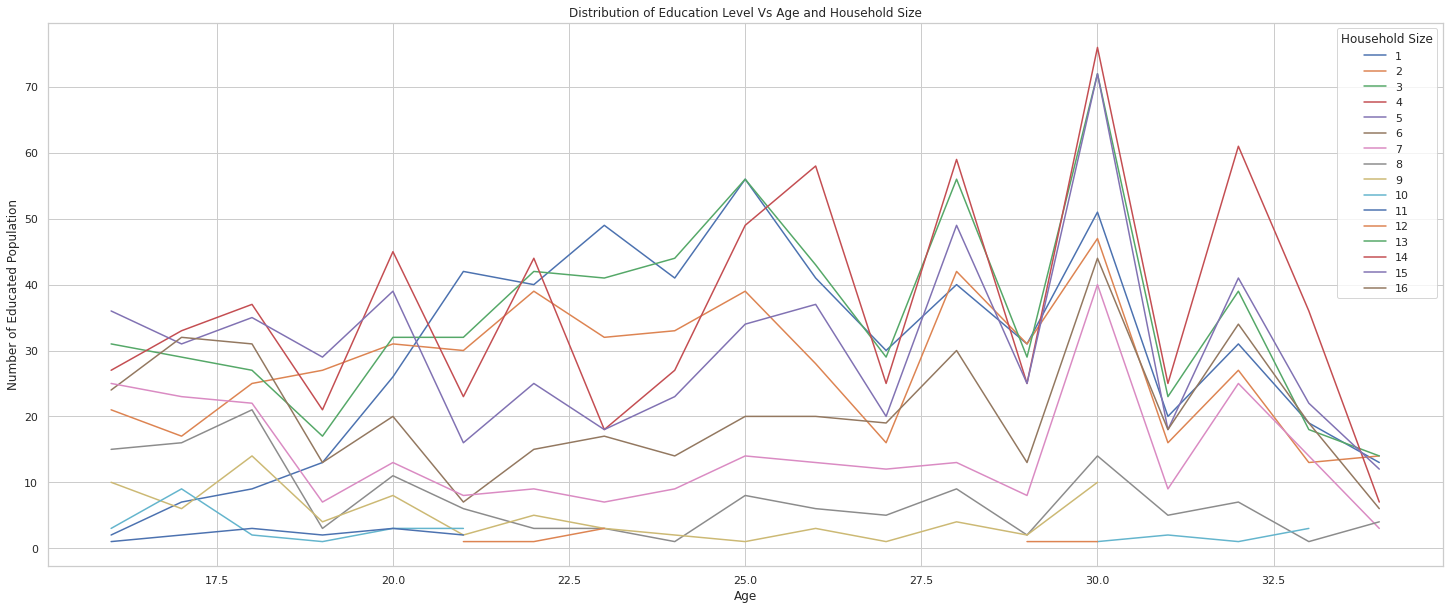

In [ ]:
#Demographic Stats

demo = subset_1[['Residence', 'Household Size', 'Resp', 'Age', 'Education', 'Marital']]

fig, ax = plt.subplots(figsize=(25,10))
demo.groupby(['Age','Household Size']).count()['Education'].unstack().plot(ax=ax)
ax.set_xlabel('Age')
ax.set_ylabel('Number of Educated Population')
ax.set_title("Distribution of Education Level Vs Age and Household Size")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Text(0.5, 1.0, 'Savings, Income Vs Age ')

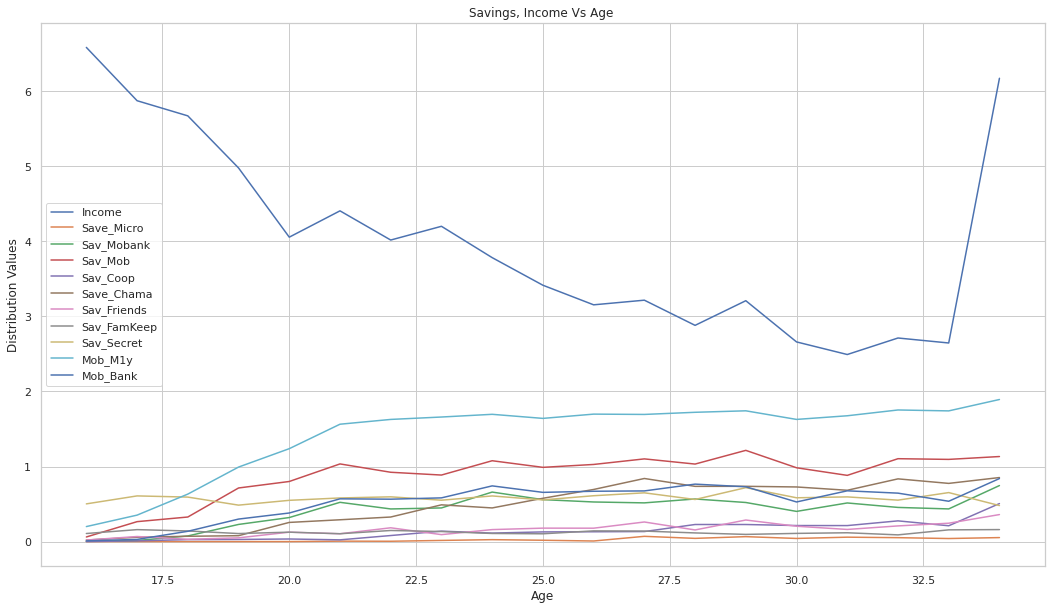

In [ ]:
fig, ax = plt.subplots(figsize=(18,10))


savings.groupby("Age")["Income",'Save_Micro', 'Sav_Mobank', 'Sav_Mob', 'Sav_Coop',
       'Save_Chama', 'Sav_Friends', 'Sav_FamKeep', 'Sav_Secret', 'Mob_M1y',
       'Mob_Bank'].mean().plot(ax=ax)

ax.set_xlabel('Age')
ax.set_ylabel('Distribution Values')
ax.set_title("Savings, Income Vs Age ")

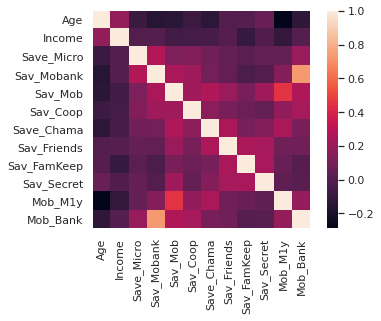

In [ ]:
corr = savings.corr()
sb.heatmap(corr, square = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Text(0.5, 1.0, 'Loans Uptake, Income Vs Age ')

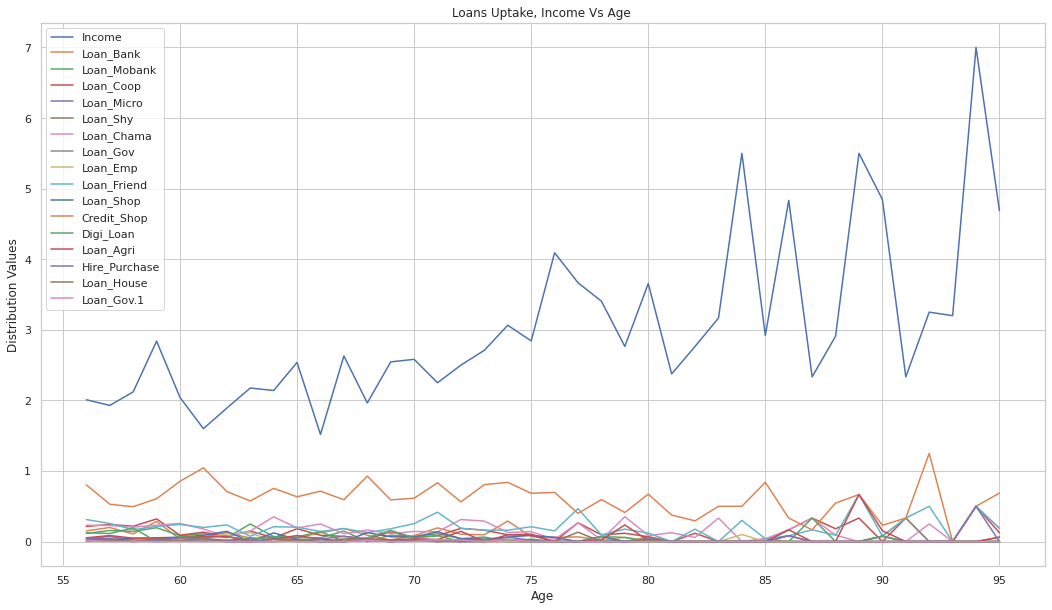

In [ ]:
#Loans

fig, ax = plt.subplots(figsize=(18,10))


loans.groupby("Age")["Income", 'Loan_Bank', 'Loan_Mobank', 'Loan_Coop', 'Loan_Micro',
       'Loan_Shy', 'Loan_Chama', 'Loan_Gov', 'Loan_Emp', 'Loan_Friend',
       'Loan_Shop', 'Credit_Shop', 'Digi_Loan', 'Loan_Agri', 'Hire_Purchase',
       'Loan_House', 'Loan_Gov.1'].mean().plot(ax=ax)

ax.set_xlabel('Age')
ax.set_ylabel('Distribution Values')
ax.set_title("Loans Uptake, Income Vs Age ")

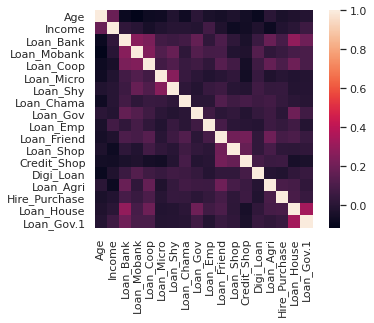

In [ ]:
corr = loans.corr()
sb.heatmap(corr, square = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Text(0.5, 1.0, 'Account Types across different Ages')

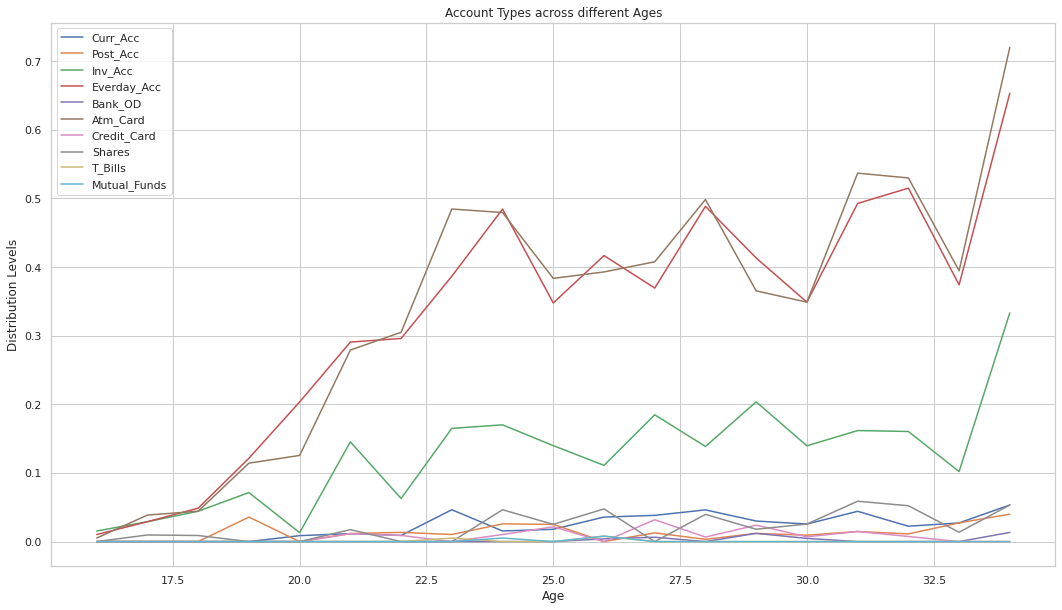

In [ ]:
fig, ax = plt.subplots(figsize=(18,10))


acc.groupby("Age")['Curr_Acc', 'Post_Acc', 'Inv_Acc',
       'Everday_Acc', 'Bank_OD', 'Atm_Card', 'Credit_Card', 'Shares',
       'T_Bills', 'Mutual_Funds'].mean().plot(ax=ax)

ax.set_xlabel('Age')
ax.set_ylabel('Distribution Levels')
ax.set_title("Account Types across different Ages")

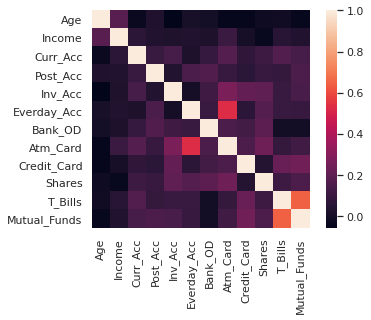

In [ ]:
corr = acc.corr()
sb.heatmap(corr, square = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Text(0.5, 1.0, 'Insurance Access vs Age')

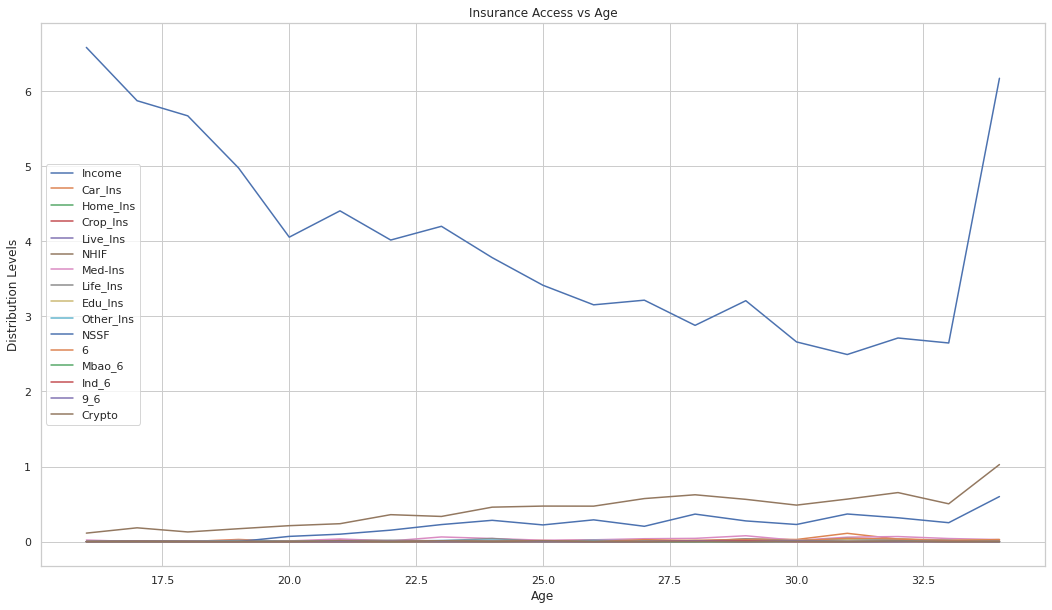

In [ ]:
# Insurance

fig, ax = plt.subplots(figsize=(18,10))


ins.groupby("Age")["Income", 'Car_Ins', 'Home_Ins', 'Crop_Ins',
       'Live_Ins', 'NHIF', 'Med-Ins', 'Life_Ins', 'Edu_Ins', 'Other_Ins',
       'NSSF', '6', 'Mbao_6', 'Ind_6', '9_6', 'Crypto'].mean().plot(ax=ax)

ax.set_xlabel('Age')
ax.set_ylabel('Distribution Levels')
ax.set_title("Insurance Access vs Age")

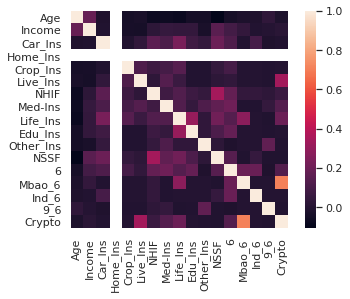

In [ ]:
corr = ins.corr()
sb.heatmap(corr, square = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



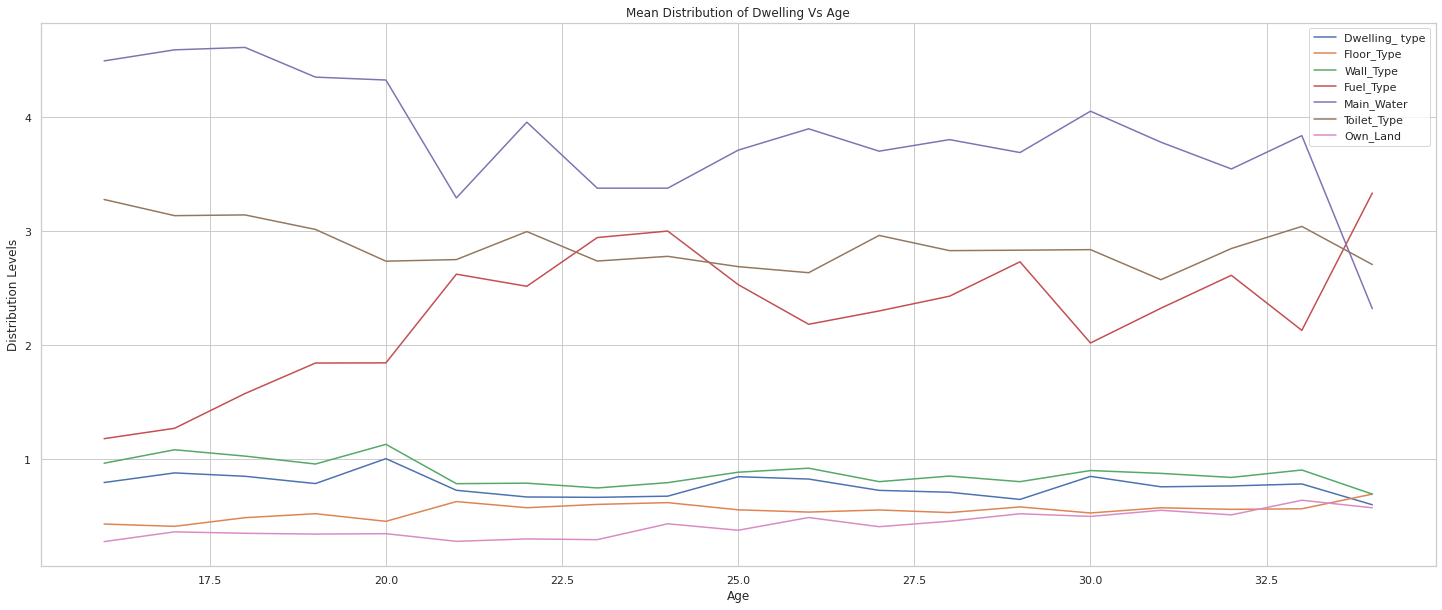

In [ ]:
# Dwelling

house = subset_1[["Age", 'Dwelling_ type','Floor_Type', 'Wall_Type', 'Fuel_Type', 'Main_Water', 'Toilet_Type', 'Own_Land',]]

fig, ax = plt.subplots(figsize=(25,10))
house.groupby("Age")['Dwelling_ type','Floor_Type', 'Wall_Type', 'Fuel_Type', 'Main_Water', 'Toilet_Type', 'Own_Land'].mean().plot(ax=ax)
ax.set_xlabel('Age')
ax.set_ylabel('Distribution Levels')
ax.set_title("Mean Distribution of Dwelling Vs Age")




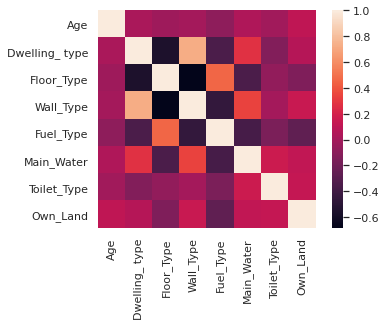

In [ ]:
corr = house.corr()
sb.heatmap(corr, square = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Text(0.5, 1.0, 'Mean Distribution of Amenities Vs Age')

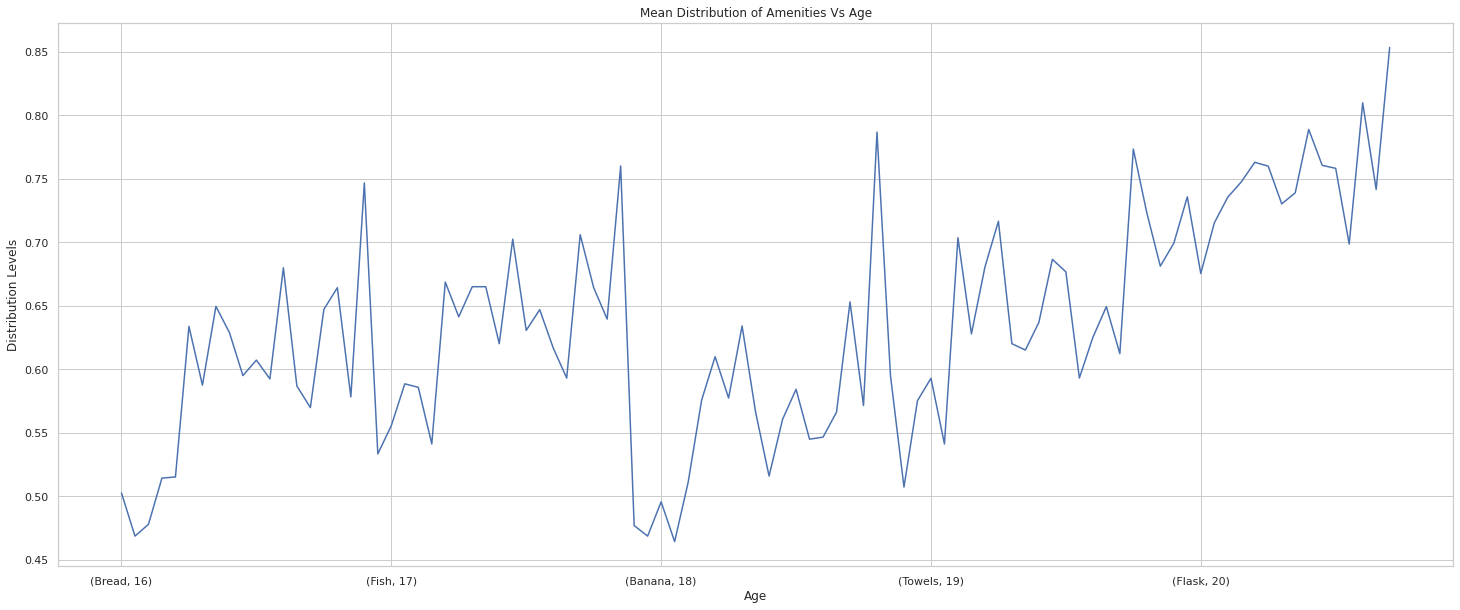

In [ ]:
# Amenities

hse_items = subset_1[["Age", 'Bread', 'Fish', 'Banana', 'Towels', 'Flask',]]

fig, ax = plt.subplots(figsize=(25,10))
hse_items.groupby("Age")['Bread', 'Fish', 'Banana', 'Towels', 'Flask'].mean().unstack().plot(ax=ax)
ax.set_xlabel('Age')
ax.set_ylabel('Distribution Levels')
ax.set_title("Mean Distribution of Amenities Vs Age")




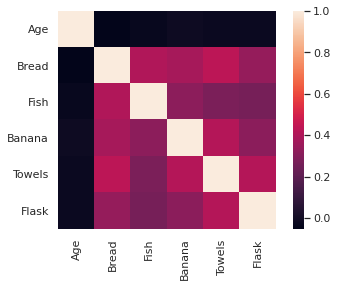

In [ ]:
corr = hse_items.corr()
sb.heatmap(corr, square = True)

**Second Cluster EDA**

Text(0.5, 1.0, 'Distribution of Education Level Vs Age and Household Size')

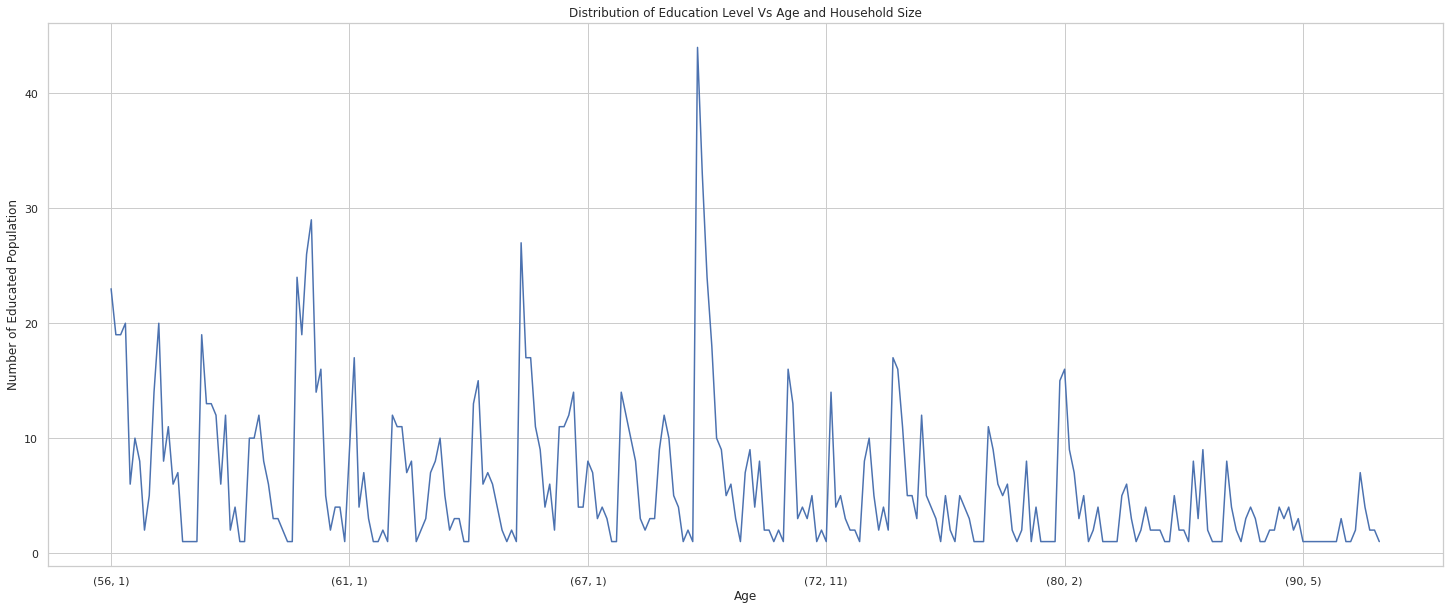

In [ ]:
# Demographic

demo = second_cluster[['Residence', 'Household Size', 'Resp', 'Age', 'Education', 'Marital']]

fig, ax = plt.subplots(figsize=(25,10))
demo.groupby(['Age','Household Size']).count()['Education'].plot(ax=ax)
ax.set_xlabel('Age')
ax.set_ylabel('Number of Educated Population')
ax.set_title("Distribution of Education Level Vs Age and Household Size")

In [ ]:
scaler  = StandardScaler()
cluster2 = scaler.fit(X)


savings = subset_2[["Age", 'Income', 'Save_Micro', 'Sav_Mobank', 'Sav_Mob', 'Sav_Coop',
       'Save_Chama', 'Sav_Friends', 'Sav_FamKeep', 'Sav_Secret', 'Mob_M1y',
       'Mob_Bank']]

loans =  subset_2[["Age", "Income", 'Loan_Bank', 'Loan_Mobank', 'Loan_Coop', 'Loan_Micro',
       'Loan_Shy', 'Loan_Chama', 'Loan_Gov', 'Loan_Emp', 'Loan_Friend',
       'Loan_Shop', 'Credit_Shop', 'Digi_Loan', 'Loan_Agri', 'Hire_Purchase',
       'Loan_House', 'Loan_Gov.1']]

acc = subset_2[["Age", "Income", 'Curr_Acc', 'Post_Acc', 'Inv_Acc',
       'Everday_Acc', 'Bank_OD', 'Atm_Card', 'Credit_Card', 'Shares',
       'T_Bills', 'Mutual_Funds']]

ins = subset_2[["Age", "Income", 'Car_Ins', 'Home_Ins', 'Crop_Ins',
       'Live_Ins', 'NHIF', 'Med-Ins', 'Life_Ins', 'Edu_Ins', 'Other_Ins',
       'NSSF', '6', 'Mbao_6', 'Ind_6', '9_6', 'Crypto']]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Text(0.5, 1.0, ' Mean Distribution of Savings, Income vs Age')

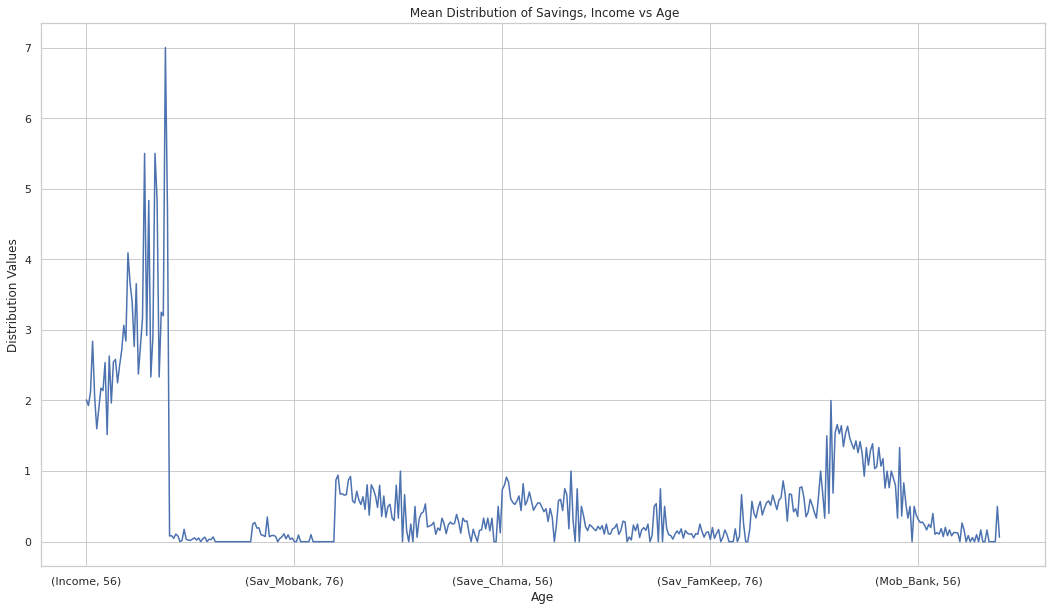

In [ ]:
fig, ax = plt.subplots(figsize=(18,10))


savings.groupby("Age")["Income",'Save_Micro', 'Sav_Mobank', 'Sav_Mob', 'Sav_Coop',
       'Save_Chama', 'Sav_Friends', 'Sav_FamKeep', 'Sav_Secret', 'Mob_M1y',
       'Mob_Bank'].mean().unstack().plot(ax=ax)

ax.set_xlabel('Age')
ax.set_ylabel('Distribution Values')
ax.set_title(" Mean Distribution of Savings, Income vs Age")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Text(0.5, 1.0, 'Mean Distribution of Account Types Vs Ages')

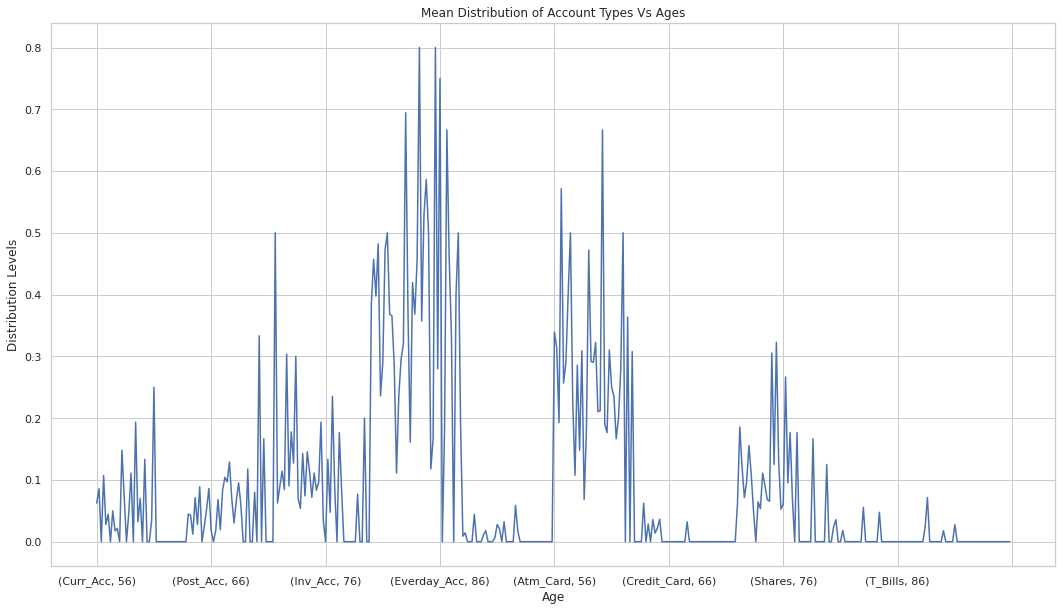

In [ ]:
fig, ax = plt.subplots(figsize=(18,10))


acc.groupby("Age")['Curr_Acc', 'Post_Acc', 'Inv_Acc',
       'Everday_Acc', 'Bank_OD', 'Atm_Card', 'Credit_Card', 'Shares',
       'T_Bills', 'Mutual_Funds'].mean().unstack().plot(ax=ax)

ax.set_xlabel('Age')
ax.set_ylabel('Distribution Levels')
ax.set_title("Mean Distribution of Account Types Vs Ages")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Text(0.5, 1.0, 'Mean Distribution of Loans Uptake, Income Vs Age ')

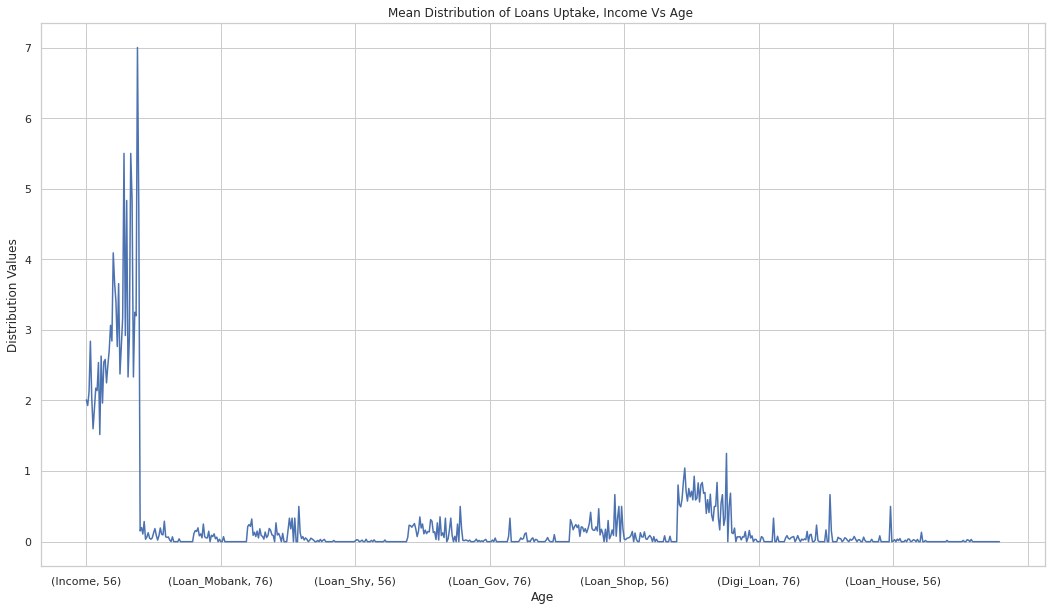

In [ ]:
#Loans

fig, ax = plt.subplots(figsize=(18,10))


loans.groupby("Age")["Income", 'Loan_Bank', 'Loan_Mobank', 'Loan_Coop', 'Loan_Micro',
       'Loan_Shy', 'Loan_Chama', 'Loan_Gov', 'Loan_Emp', 'Loan_Friend',
       'Loan_Shop', 'Credit_Shop', 'Digi_Loan', 'Loan_Agri', 'Hire_Purchase',
       'Loan_House', 'Loan_Gov.1'].mean().unstack().plot(ax=ax)

ax.set_xlabel('Age')
ax.set_ylabel('Distribution Values')
ax.set_title("Mean Distribution of Loans Uptake, Income Vs Age ")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Text(0.5, 1.0, 'Mean Distribution of Dwelling Vs Age')

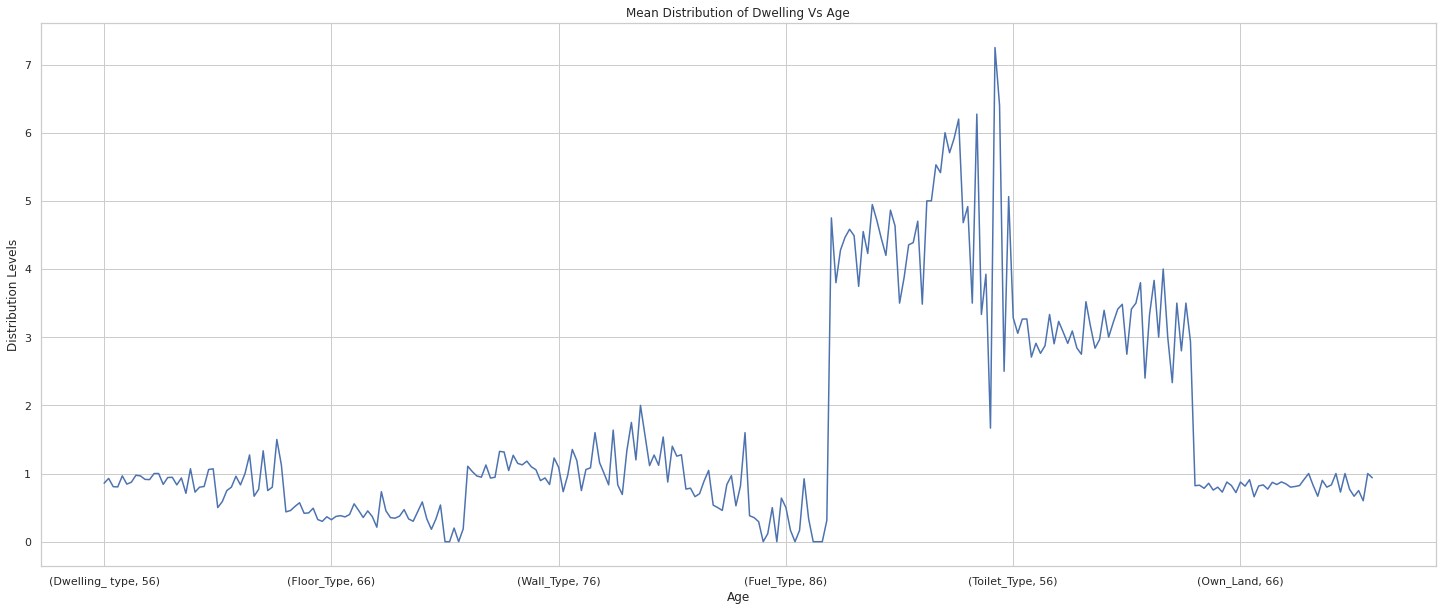

In [ ]:
# Dwelling

house = subset_2[["Age", 'Dwelling_ type','Floor_Type', 'Wall_Type', 'Fuel_Type', 'Main_Water', 'Toilet_Type', 'Own_Land',]]

fig, ax = plt.subplots(figsize=(25,10))
house.groupby("Age")['Dwelling_ type','Floor_Type', 'Wall_Type', 'Fuel_Type', 'Main_Water', 'Toilet_Type', 'Own_Land'].mean().unstack().plot(ax=ax)
ax.set_xlabel('Age')
ax.set_ylabel('Distribution Levels')
ax.set_title("Mean Distribution of Dwelling Vs Age")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Text(0.5, 1.0, 'Mean Distribution of Amenities Vs Age')

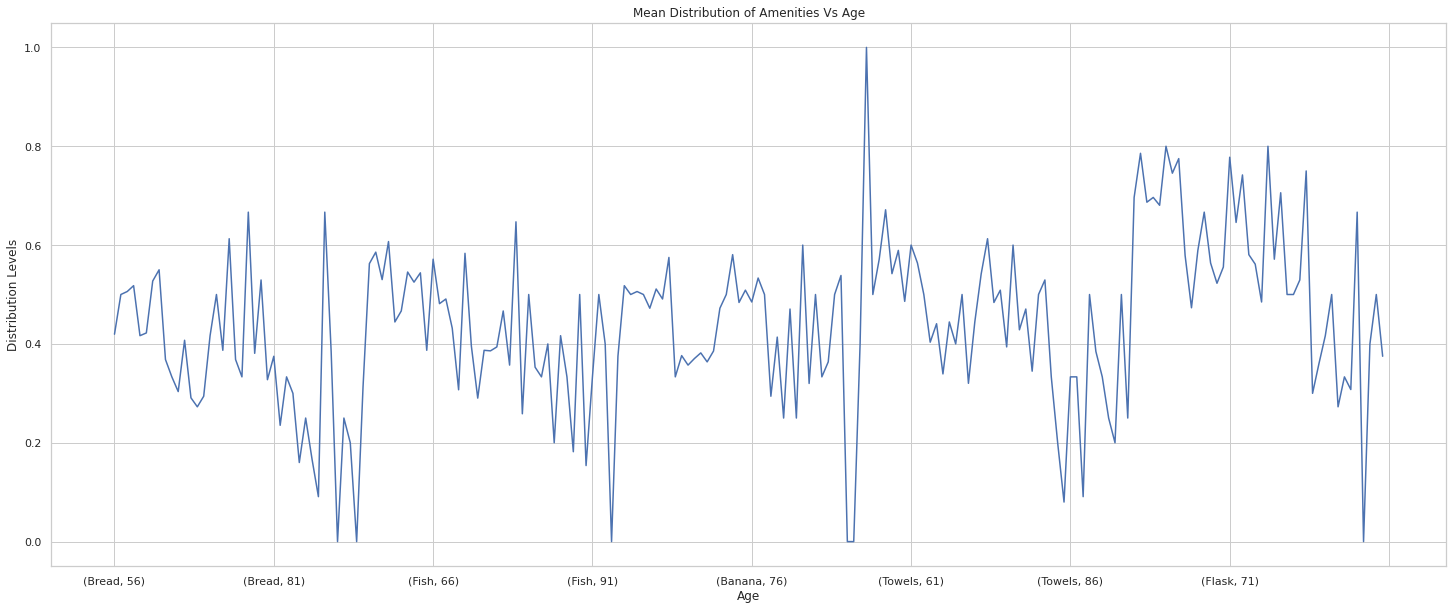

In [ ]:
# Amenities

hse_items = subset_2[["Age", 'Bread', 'Fish', 'Banana', 'Towels', 'Flask',]]

fig, ax = plt.subplots(figsize=(25,10))
hse_items.groupby("Age")['Bread', 'Fish', 'Banana', 'Towels', 'Flask'].mean().unstack().plot(ax=ax)
ax.set_xlabel('Age')
ax.set_ylabel('Distribution Levels')
ax.set_title("Mean Distribution of Amenities Vs Age")

**Third Cluster EDA**

Text(0, 0.5, 'Number of Educated Population')

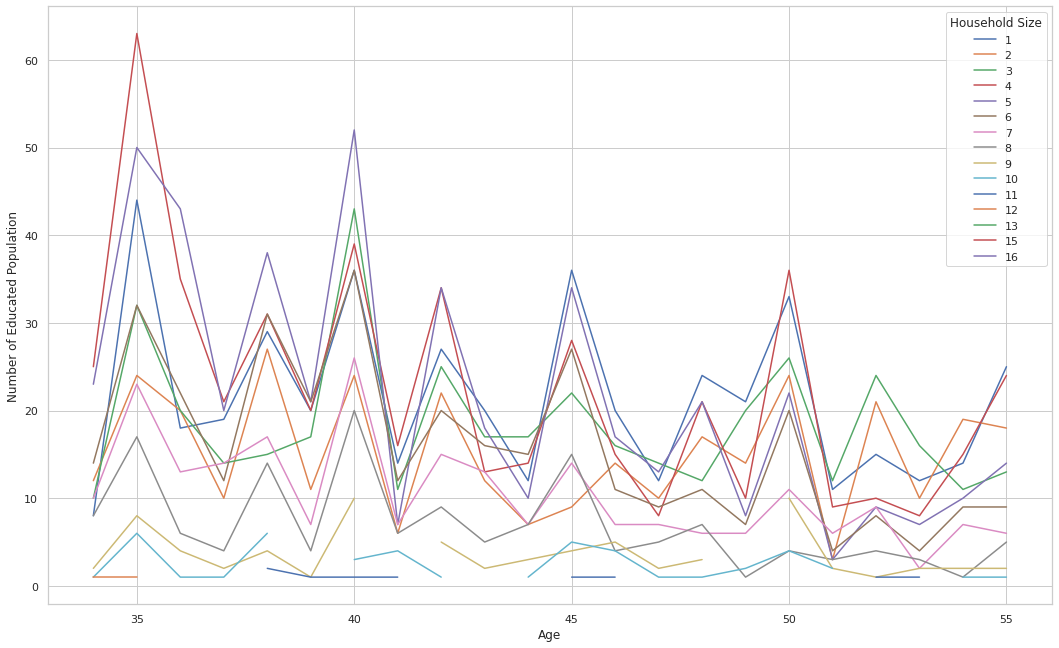

In [ ]:
demo = third_cluster[['Residence', 'Household Size', 'Resp', 'Age', 'Education', 'Marital']]

fig, ax = plt.subplots(figsize=(18,11))
demo.groupby(['Age','Household Size']).count()['Education'].unstack().plot(ax=ax)
ax.set_xlabel('Age')
ax.set_ylabel('Number of Educated Population')

In [ ]:
scaler  = StandardScaler()
cluster3 = scaler.fit(X)


savings = subset_3[["Age", 'Income', 'Save_Micro', 'Sav_Mobank', 'Sav_Mob', 'Sav_Coop',
       'Save_Chama', 'Sav_Friends', 'Sav_FamKeep', 'Sav_Secret', 'Mob_M1y',
       'Mob_Bank']]

loans =  subset_3[["Age", "Income", 'Loan_Bank', 'Loan_Mobank', 'Loan_Coop', 'Loan_Micro',
       'Loan_Shy', 'Loan_Chama', 'Loan_Gov', 'Loan_Emp', 'Loan_Friend',
       'Loan_Shop', 'Credit_Shop', 'Digi_Loan', 'Loan_Agri', 'Hire_Purchase',
       'Loan_House', 'Loan_Gov.1']]

acc = subset_3[["Age", "Income", 'Curr_Acc', 'Post_Acc', 'Inv_Acc',
       'Everday_Acc', 'Bank_OD', 'Atm_Card', 'Credit_Card', 'Shares',
       'T_Bills', 'Mutual_Funds']]

ins = subset_3[["Age", "Income", 'Car_Ins', 'Home_Ins', 'Crop_Ins',
       'Live_Ins', 'NHIF', 'Med-Ins', 'Life_Ins', 'Edu_Ins', 'Other_Ins',
       'NSSF', '6', 'Mbao_6', 'Ind_6', '9_6', 'Crypto']]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Text(0.5, 1.0, 'Mean Distributions of Savings, Income Vs Age ')

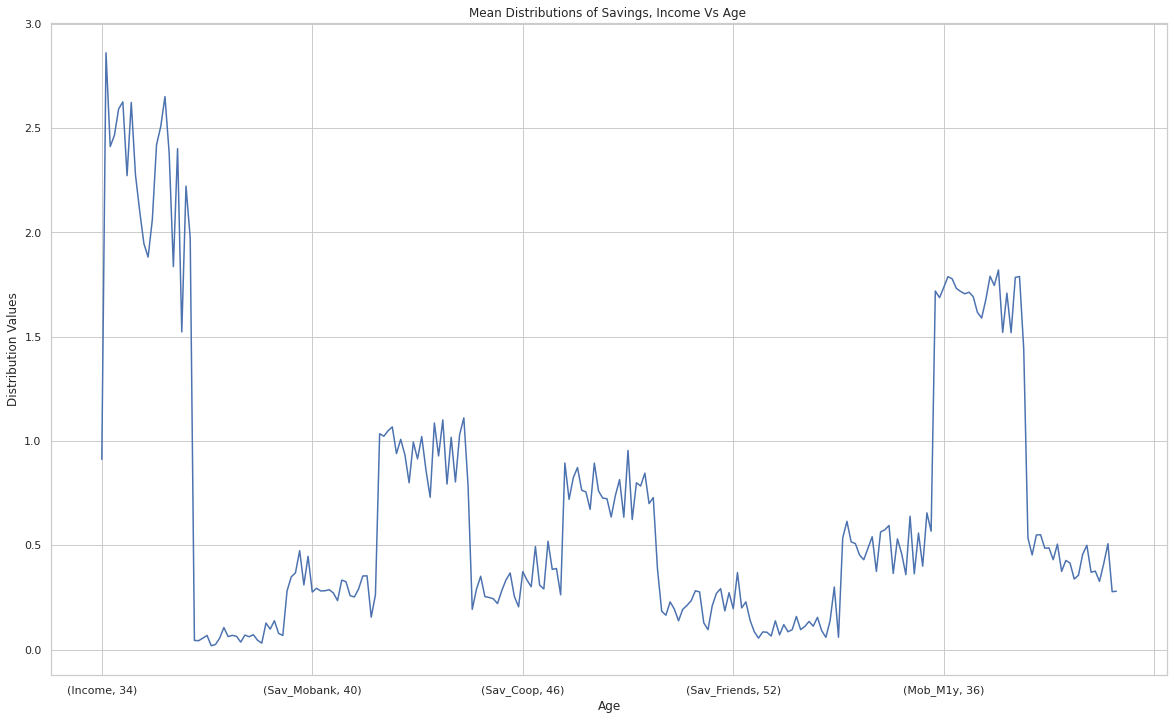

In [ ]:
fig, ax = plt.subplots(figsize=(20,12))


savings.groupby("Age")["Income",'Save_Micro', 'Sav_Mobank', 'Sav_Mob', 'Sav_Coop',
       'Save_Chama', 'Sav_Friends', 'Sav_FamKeep', 'Sav_Secret', 'Mob_M1y',
       'Mob_Bank'].mean().unstack().plot(ax=ax)

ax.set_xlabel('Age')
ax.set_ylabel('Distribution Values')
ax.set_title("Mean Distributions of Savings, Income Vs Age ")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Text(0.5, 1.0, 'Loans Uptake, Income Vs Age ')

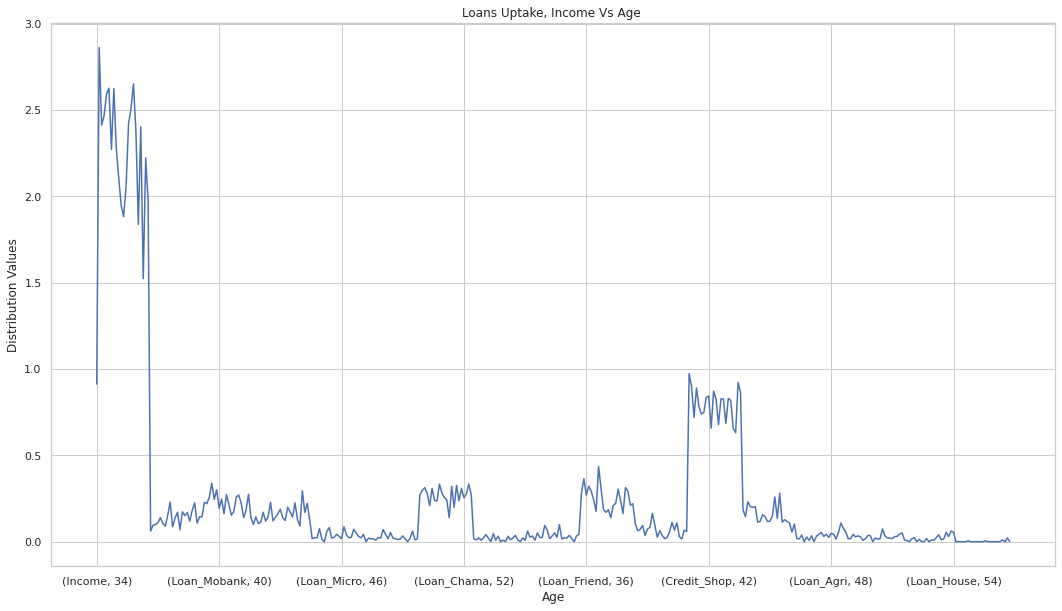

In [ ]:
# Loans

fig, ax = plt.subplots(figsize=(18,10))


loans.groupby("Age")["Income", 'Loan_Bank', 'Loan_Mobank', 'Loan_Coop', 'Loan_Micro',
       'Loan_Shy', 'Loan_Chama', 'Loan_Gov', 'Loan_Emp', 'Loan_Friend',
       'Loan_Shop', 'Credit_Shop', 'Digi_Loan', 'Loan_Agri', 'Hire_Purchase',
       'Loan_House', 'Loan_Gov.1'].mean().unstack().plot(ax=ax)

ax.set_xlabel('Age')
ax.set_ylabel('Distribution Values')
ax.set_title("Loans Uptake, Income Vs Age ")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Text(0.5, 1.0, 'Account Types across different Ages')

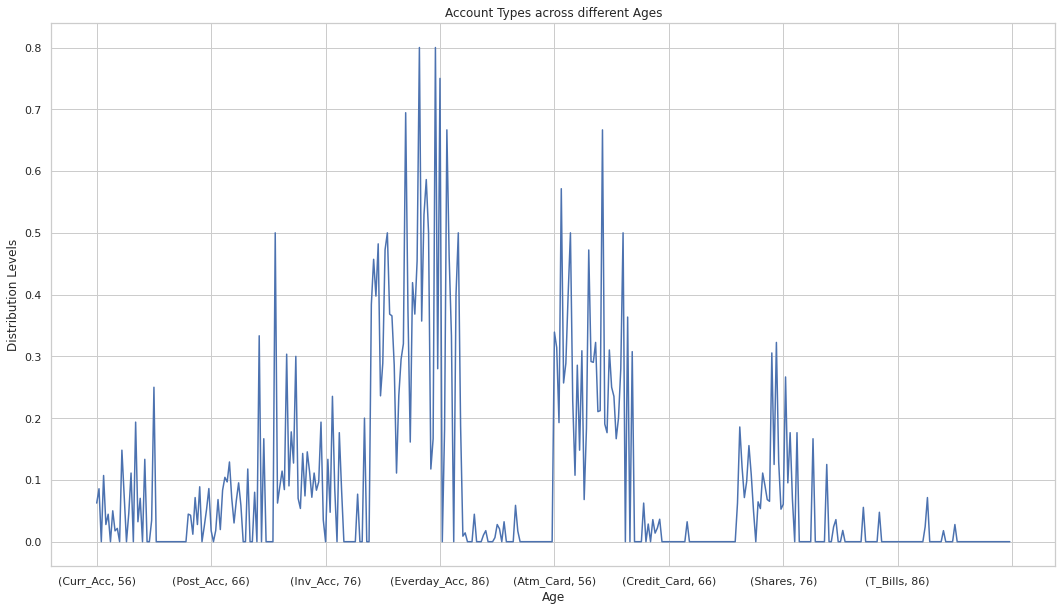

In [ ]:
# Account_Type

fig, ax = plt.subplots(figsize=(18,10))


acc.groupby("Age")['Curr_Acc', 'Post_Acc', 'Inv_Acc',
       'Everday_Acc', 'Bank_OD', 'Atm_Card', 'Credit_Card', 'Shares',
       'T_Bills', 'Mutual_Funds'].mean().unstack().plot(ax=ax)

ax.set_xlabel('Age')
ax.set_ylabel('Distribution Levels')
ax.set_title("Account Types across different Ages")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Text(0.5, 1.0, 'Insurance Access vs Age')

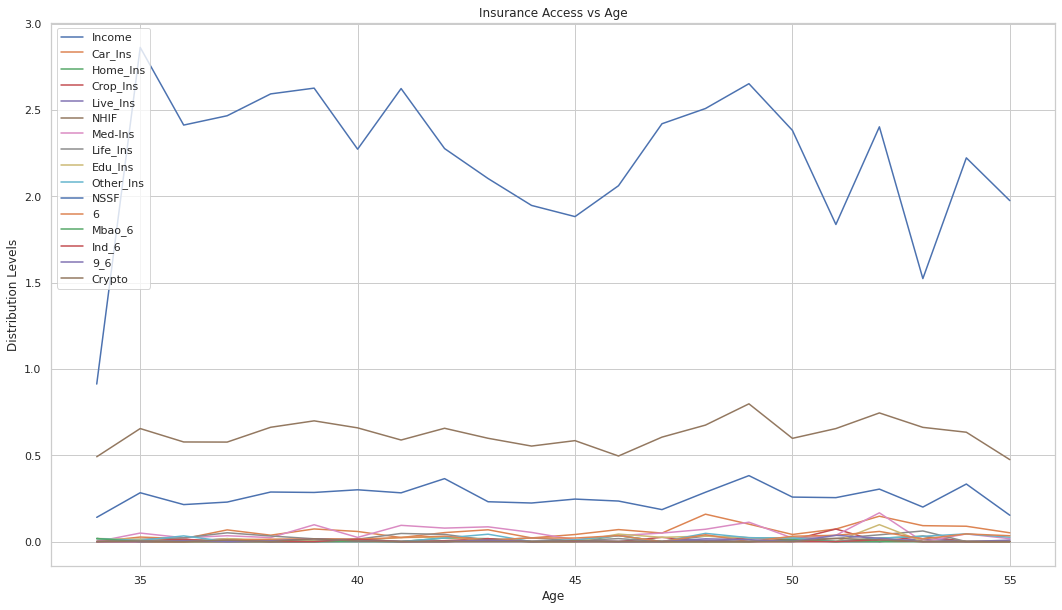

In [ ]:
#insurance

fig, ax = plt.subplots(figsize=(18,10))


ins.groupby("Age")["Income", 'Car_Ins', 'Home_Ins', 'Crop_Ins',
       'Live_Ins', 'NHIF', 'Med-Ins', 'Life_Ins', 'Edu_Ins', 'Other_Ins',
       'NSSF', '6', 'Mbao_6', 'Ind_6', '9_6', 'Crypto'].mean().plot(ax=ax)

ax.set_xlabel('Age')
ax.set_ylabel('Distribution Levels')
ax.set_title("Insurance Access vs Age")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Text(0.5, 1.0, 'Mean Distribution of Dwelling Vs Age')

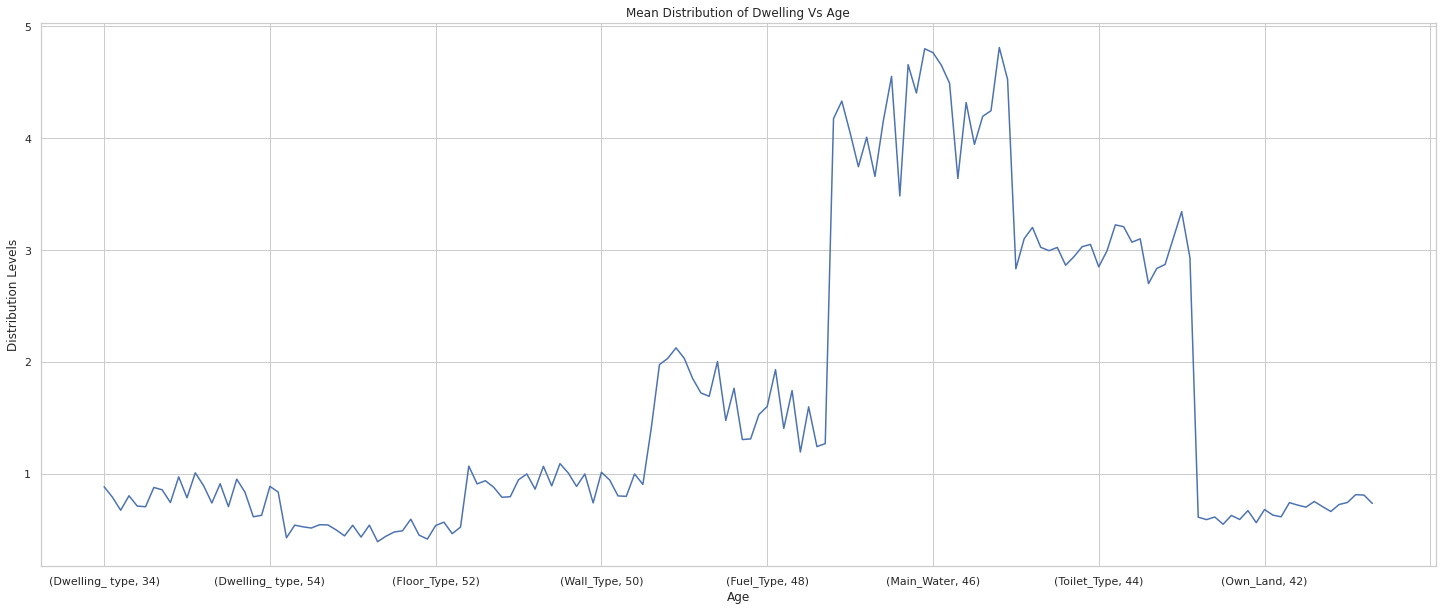

In [ ]:
# Dwelling

house = subset_3[["Age", 'Dwelling_ type','Floor_Type', 'Wall_Type', 'Fuel_Type', 'Main_Water', 'Toilet_Type', 'Own_Land',]]

fig, ax = plt.subplots(figsize=(25,10))
house.groupby("Age")['Dwelling_ type','Floor_Type', 'Wall_Type', 'Fuel_Type', 'Main_Water', 'Toilet_Type', 'Own_Land'].mean().unstack().plot(ax=ax)
ax.set_xlabel('Age')
ax.set_ylabel('Distribution Levels')
ax.set_title("Mean Distribution of Dwelling Vs Age")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Text(0.5, 1.0, 'Mean Distribution of Amenities Vs Age')

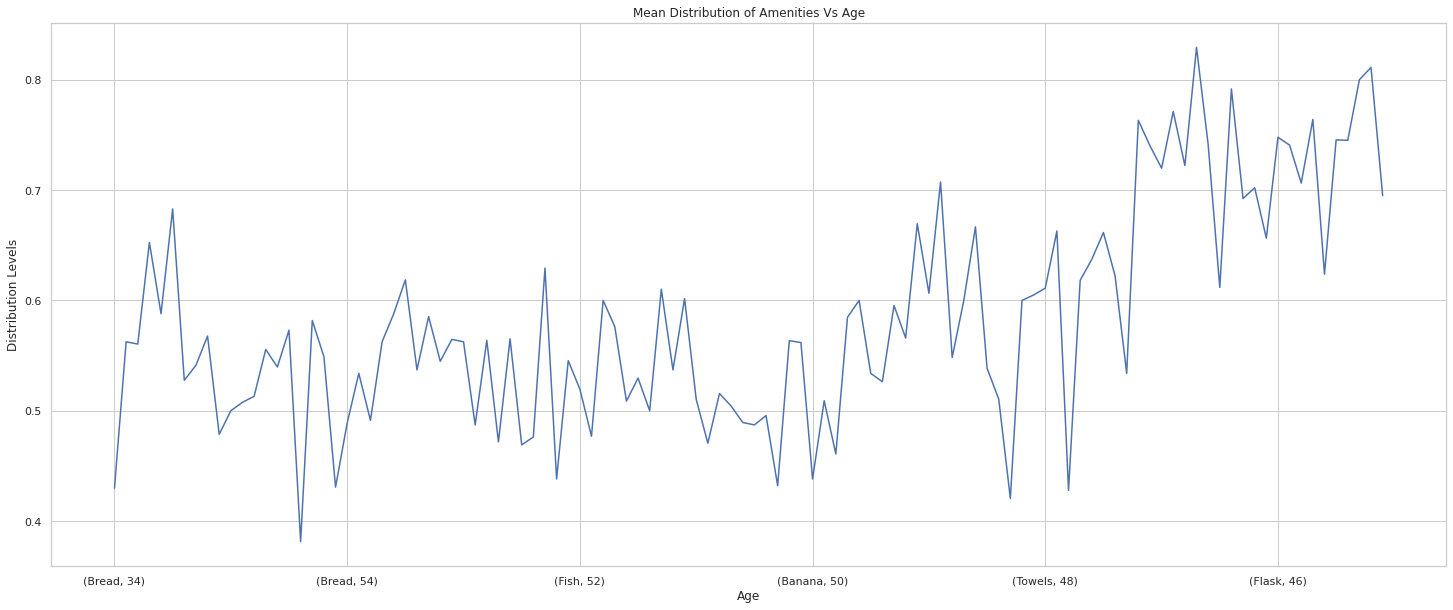

In [ ]:
# Amenities

hse_items = subset_3[["Age", 'Bread', 'Fish', 'Banana', 'Towels', 'Flask',]]

fig, ax = plt.subplots(figsize=(25,10))
hse_items.groupby("Age")['Bread', 'Fish', 'Banana', 'Towels', 'Flask'].mean().unstack().plot(ax=ax)
ax.set_xlabel('Age')
ax.set_ylabel('Distribution Levels')
ax.set_title("Mean Distribution of Amenities Vs Age")